In [498]:
#Social_Network_Ads.csv

**Import libraries**

In [499]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

**Importing the dataset**

In [500]:
df=pd.read_csv('Data/Social_Network_Ads.csv')

**Data Preprocessing**

In [501]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [502]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [503]:
#Check Null Values

df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

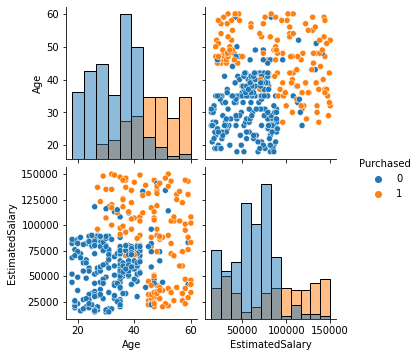

In [504]:
#find pattern
sns.pairplot(df[['Age','EstimatedSalary','Purchased']],hue='Purchased',diag_kind='hist')

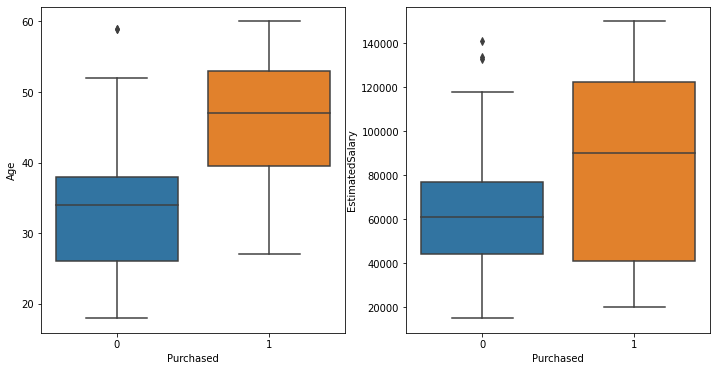

In [505]:
#check outliers
fig,ax=plt.subplots(1,2,figsize=(12,6))
sns.boxplot(x=df['Purchased'],y=df['Age'],ax=ax[0])
sns.boxplot(x=df['Purchased'],y=df['EstimatedSalary'],ax=ax[1])

In [506]:
df['Gender']=df['Gender'].map({'Male':1,'Female':0})
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


In [507]:
df['Gender'].value_counts() #('Male':1,'Female':0)

0    204
1    196
Name: Gender, dtype: int64

**Splitting the dataset into the Training set and Test set**

In [508]:
x=df[['Age','EstimatedSalary']]
y=df['Purchased']

In [509]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

**Feature Scaling**

In [510]:
sscaler=StandardScaler()
x_train=sscaler.fit_transform(x_train)
x_test=sscaler.fit_transform(x_test)

**Fitting SVM to the Training set**

In [511]:
C=1 #previously used 0.001 that provide worst output so i used 1
#svm_model=SVC(kernel='linear',C=C) #0.85
#svm_model=SVC(kernel='poly',degree=3,C=C,gamma='auto') #0.90
svm_model=SVC(kernel='rbf',C=C,gamma=0.1) #0.93
svm_model.fit(x_train,y_train)

SVC(C=1, gamma=0.1)

**Predicting the Test set results**

In [512]:
y_pred=svm_model.predict(x_test)
y_pred

array([1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0])

**Accuracy Score**

In [513]:
acc=accuracy_score(y_test,y_pred)
print('Accuracy Score\n','{:.2f}'.format(acc))

Accuracy Score
 0.93


**Making the Confusion Matrix**

In [514]:
cnf=confusion_matrix(y_test,y_pred)
print('Confusion Matrix\n',cnf)

Confusion Matrix
 [[48  4]
 [ 2 26]]


In [515]:
clsr=classification_report(y_test,y_pred)
print('Classification Report\n',clsr)

Classification Report
               precision    recall  f1-score   support

           0       0.96      0.92      0.94        52
           1       0.87      0.93      0.90        28

    accuracy                           0.93        80
   macro avg       0.91      0.93      0.92        80
weighted avg       0.93      0.93      0.93        80



**Visualising the Training set results**

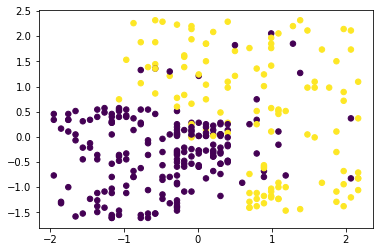

In [516]:
support_vectors=svm_model.support_vectors_
support_vectors
plt.scatter(x_train[:,0],x_train[:,1],c=y_train,s=30)

plt.show()

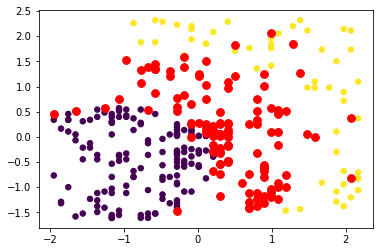

In [517]:
plt.scatter(x_train[:,0],x_train[:,1],c=y_train,s=30)
plt.scatter(support_vectors[:,0],support_vectors[:,1],color='red',s=60)
plt.show()

**Visualising the Test set results**

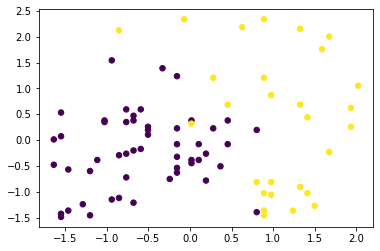

In [518]:
support_vectors=svm_model.support_vectors_
support_vectors
plt.scatter(x_test[:,0],x_test[:,1],c=y_test,s=30)
plt.show()

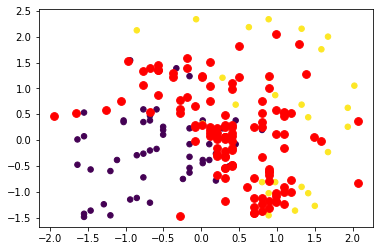

In [519]:
plt.scatter(x_test[:,0],x_test[:,1],c=y_test,s=30)
plt.scatter(support_vectors[:,0],support_vectors[:,1],color='red',s=60)
plt.show()